In [ ]:
try:
    %tensorflow_version 2.x
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Note: using Google CoLab


In [ ]:
# import libray functions

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN,Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
%matplotlib inline

In [ ]:
url='https://raw.githubusercontent.com/niloytanvir/heart-failure-data/main/Data/heart_failure_clinical_records_dataset.csv'
data = pd.read_csv(url)

In [ ]:
x = data.iloc[:,:-1].values
y = data['DEATH_EVENT']

In [ ]:
x = x.reshape(x.shape[0], x.shape[1], 1)

In [ ]:
xtrain, a, ytrain, b=train_test_split(x, y, test_size=0.20, random_state=101)

In [ ]:
xtest,xpred,ytest,ypred=train_test_split(a, b, test_size=0.15, random_state=101)

In [ ]:
# F1 Score custom metrics
from keras import backend as K
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [ ]:
model = Sequential()
model.add(layers.SimpleRNN(128))
model.add(Dense(32, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy',f1_score,tf.keras.metrics.Precision(),tf.keras.metrics.Recall()])
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-5, patience=5, 
                        verbose=1, mode='auto', restore_best_weights=True)

In [ ]:
rnn =  model.fit(xtrain,ytrain,validation_data=(xtest,ytest),
          callbacks=[monitor],verbose=2,epochs=100).history

Epoch 1/100
8/8 - 22s - loss: 0.5919 - accuracy: 0.7615 - f1_score: 0.6088 - precision: 0.5940 - recall: 0.7303 - val_loss: 0.3832 - val_accuracy: 0.9020 - val_f1_score: 0.7000 - val_precision: 0.6794 - val_recall: 0.5922
Epoch 2/100
8/8 - 0s - loss: 0.4806 - accuracy: 0.8117 - f1_score: 0.5893 - precision: 0.7267 - recall: 0.5497 - val_loss: 0.4010 - val_accuracy: 0.8039 - val_f1_score: 0.6000 - val_precision: 0.7356 - val_recall: 0.5623
Epoch 3/100
8/8 - 0s - loss: 0.5131 - accuracy: 0.7657 - f1_score: 0.6646 - precision: 0.6994 - recall: 0.5950 - val_loss: 0.3025 - val_accuracy: 0.9020 - val_f1_score: 0.7000 - val_precision: 0.7026 - val_recall: 0.6004
Epoch 4/100
8/8 - 0s - loss: 0.4972 - accuracy: 0.8075 - f1_score: 0.6543 - precision: 0.7219 - recall: 0.5849 - val_loss: 0.3214 - val_accuracy: 0.9020 - val_f1_score: 0.7286 - val_precision: 0.7334 - val_recall: 0.5807
Epoch 5/100
8/8 - 0s - loss: 0.4679 - accuracy: 0.8285 - f1_score: 0.6309 - precision: 0.7474 - recall: 0.5877 - va

In [ ]:
test_pred = model.predict(xtest)

In [ ]:
(test_pred > 0.5).astype("int32")

array([[0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [ ]:
test_fpr , test_tpr, _ = roc_curve(ytest,test_pred)
test_roc_auc = auc(test_fpr, test_tpr)

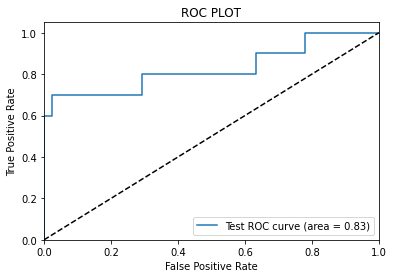

In [ ]:
    plt.figure()
    plt.plot(test_fpr, test_tpr, label='Test ROC curve (area = %0.2f)' % test_roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC PLOT')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
 score = model.evaluate(xpred,  ypred, verbose=2)

print('\nEvaluation:', score)

1/1 - 0s - loss: 0.2410 - accuracy: 0.8889 - f1_score: 0.9091 - precision: 0.7842 - recall: 0.5948

Evaluation: [0.24097299575805664, 0.8888888955116272, 0.9090908169746399, 0.7841726541519165, 0.5948158502578735]


In [ ]:
pred = model.predict(xpred)

In [ ]:
(pred > 0.5).astype("int32")

array([[1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
ypred

56     0
177    0
48     1
4      1
169    0
19     1
39     1
41     1
280    0
Name: DEATH_EVENT, dtype: int64

In [ ]:
fpr , tpr, _ = roc_curve(ypred,pred)
roc_auc = auc(fpr, tpr)

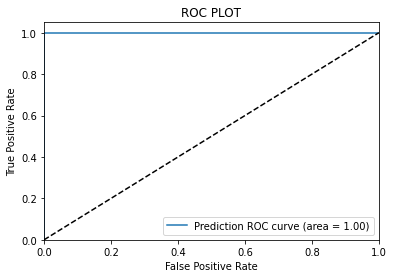

In [ ]:
    plt.figure()
    plt.plot(fpr, tpr, label='Prediction ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC PLOT')
    plt.legend(loc="lower right")
    plt.show()

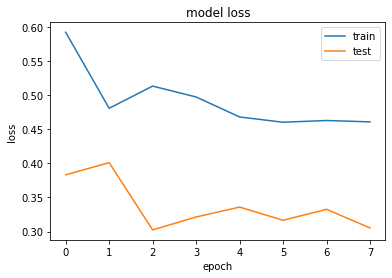

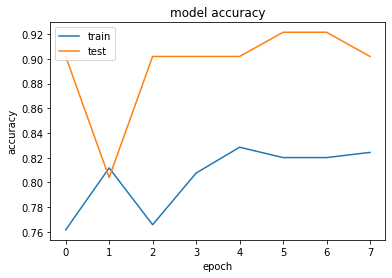

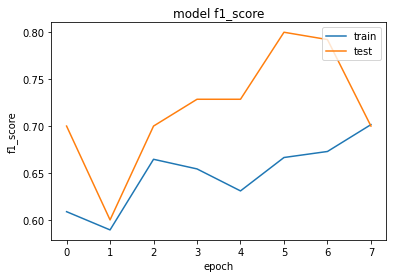

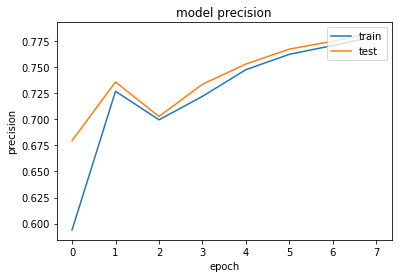

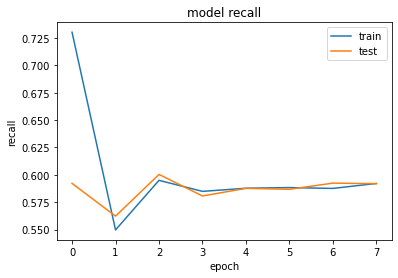

In [ ]:
plt.plot(rnn['loss'])
plt.plot(rnn['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(rnn['accuracy'])
plt.plot(rnn['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(rnn['f1_score'])
plt.plot(rnn['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(rnn['precision'])
plt.plot(rnn['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()


plt.plot(rnn['recall'])
plt.plot(rnn['val_recall'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()